In [ ]:
import pandas as pd
import torch
import re
from bert_score import score

# Load the DataFrame from the Excel file
input_file = "Abstract_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    abstract = row['Abstract']

    # Clean the abstract and claims text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))

    # Combine the cleaned abstract and claims
    original_text = abstract
    generated_summary = str(row['Abstract_Summary_t5_base'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_base_abstract_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


Output:

image.png

In [2]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import re
from bert_score import score

# Load the DataFrame from the Excel file
input_file = "Claims_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    abstract = row['Claims']

    # Clean the abstract and claims text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))

    # Combine the cleaned abstract and claims
    original_text = abstract
    generated_summary = str(row['Claims_Summary_t5_base'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_base_claims_total.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


OUtput : executed in the server

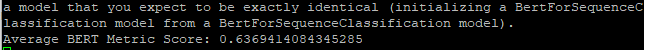

In [ ]:
import pandas as pd
import torch
import re
from bert_score import score
from tqdm import tqdm

# Load the DataFrame from the Excel file
input_file = "Combined_Google_patent_Summary_t5_base_file.xlsx"
df = pd.read_excel(input_file)

# Define lists to store the BERT metric scores
bert_metric_scores = []

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create a progress bar
progress_bar = tqdm(total=len(df), desc="Processing")

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Get the original text and the generated summary
    abstract = row['Abstract_Summary_t5_base']
    claims = row['Claims_Summary_t5_base']

    # Clean the abstract and claims text
    abstract = re.sub(r'[^\x00-\x7F]+', '', str(abstract))
    claims = re.sub(r'[^\x00-\x7F]+', '', str(claims))

    # Combine the cleaned abstract and claims
    original_text = abstract+' '+claims
    generated_summary = str(row['Combined_Summary'])

    # Calculate BERT metric scores
    _, _, bert_metric_score = score([generated_summary], [original_text], model_type="bert-base-uncased", device=device)

    # Append the score to the BERT metric scores list
    bert_metric_scores.append(bert_metric_score.item())

    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

# Add the scores to the DataFrame
df["BERT_Metric_Score"] = bert_metric_scores

# Save the updated DataFrame to a new Excel file
output_file = "Summary_Scores_BERT_metric_t5_base_total_combined.xlsx"
df.to_excel(output_file, index=False)

# Print the average BERT metric score
print("Average BERT Metric Score:", sum(bert_metric_scores) / len(bert_metric_scores))


Output : executed in the server

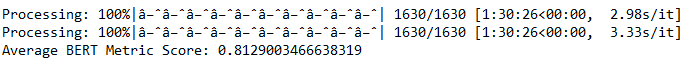